In [1]:
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/supervised')

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_csv('car_details_v4.csv')
df = df.assign(Age = lambda x: 2025 - x["Year"])

In [88]:

df1 = df[ 
  (df["Year"] > 2010) 
   & (df["Make"].isin(["BMW","Maruti Suzuki"])) 
    & (df["Fuel Type"].isin(["Petrol","Diesel"])) 
     & (df["Seating Capacity"] == 5)
]

In [51]:
print(df["Make"].value_counts().to_dict())

{'Maruti Suzuki': 440, 'Hyundai': 349, 'Mercedes-Benz': 171, 'Honda': 158, 'Toyota': 132, 'Audi': 127, 'BMW': 121, 'Mahindra': 119, 'Tata': 57, 'Volkswagen': 50, 'Ford': 48, 'Renault': 43, 'Skoda': 40, 'Land Rover': 33, 'Kia': 23, 'Jeep': 18, 'Jaguar': 17, 'MG': 17, 'Nissan': 16, 'Volvo': 16, 'Porsche': 15, 'MINI': 11, 'Datsun': 8, 'Chevrolet': 7, 'Lexus': 6, 'Mitsubishi': 4, 'Ssangyong': 3, 'Rolls-Royce': 3, 'Isuzu': 2, 'Fiat': 2, 'Maserati': 1, 'Ferrari': 1, 'Lamborghini': 1}


<Axes: xlabel='Kilometer', ylabel='Price'>

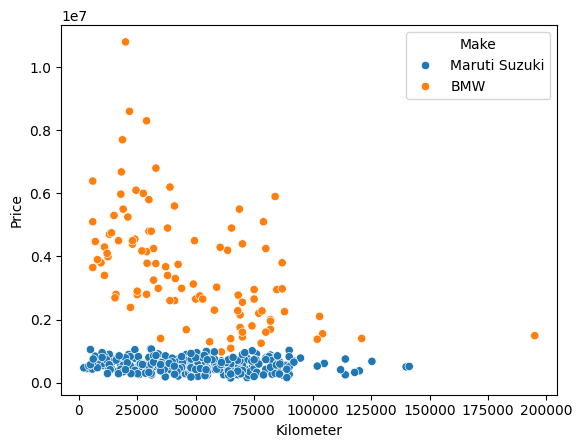

In [52]:
sns.scatterplot(data=df1, x="Kilometer", y="Price", hue="Make")

In [53]:
df1.head(2)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Age
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,11
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,...,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0,8


In [75]:
X1=df1[["Kilometer", "Fuel Type", "Transmission"]]
y1=df1["Make"]

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.35, random_state=45)

from sklearn.preprocessing import LabelEncoder
fuel_type_encoder = LabelEncoder()
X1_train["Fuel Type"] = fuel_type_encoder.fit_transform(X1_train["Fuel Type"])
X1_test["Fuel Type"] = fuel_type_encoder.transform(X1_test["Fuel Type"])

transmission_encoder = LabelEncoder()
X1_train["Transmission"] = transmission_encoder.fit_transform(X1_train["Transmission"])
X1_test["Transmission"] = transmission_encoder.transform(X1_test["Transmission"])

make_encoder = LabelEncoder()
y1_train = make_encoder.fit_transform(y1_train)
y1_test = make_encoder.transform(y1_test)


In [76]:
X1_train

,Kilometer,Fuel Type,Transmission
1678,80000,0,0
1234,62000,0,1
1065,7942,1,1
5,73315,1,1
1671,65000,0,1
...,...,...,...
475,50000,0,0
151,38779,1,1
1797,48000,1,1
598,44710,1,1


In [77]:
y1_train

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=10, p=2, algorithm="ball_tree")
knn1.fit(X1_train, y1_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'ball_tree'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [79]:
y1_pred = knn1.predict(X1_test)
print(y1_pred[:4],"...")
print(y1_pred.shape)

[1 1 0 1] ...
(153,)


In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("KNN Neighbours:: predicts (Honda or BMW)", y1_pred)
print("KNN Neighbours:: Accuracy score is ", accuracy_score(y_true=y1_test,y_pred=y1_pred))
print("KNN Neighbours:: Classification Report is \n", classification_report(y_true=y1_test,y_pred=y1_pred))
print("KNN Neighbours:: Confusion Matrix is \n", confusion_matrix(y_true=y1_test,y_pred=y1_pred))

KNN Neighbours:: predicts (Honda or BMW) [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
KNN Neighbours:: Accuracy score is  0.7973856209150327
KNN Neighbours:: Classification Report is 
               precision    recall  f1-score   support

           0       0.36      0.14      0.21        28
           1       0.83      0.94      0.88       125

    accuracy                           0.80       153
   macro avg       0.60      0.54      0.54       153
weighted avg       0.75      0.80      0.76       153

KNN Neighbours:: Confusion Matrix is 
 [[  4  24]
 [  7 118]]


In [92]:
X2=df1[["Kilometer", "Fuel Type", "Transmission"]]
y2=df1["Price"]

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.35, random_state=45)

from sklearn.preprocessing import LabelEncoder
fuel_type_encoder = LabelEncoder()
X2_train["Fuel Type"] = fuel_type_encoder.fit_transform(X2_train["Fuel Type"])
X2_test["Fuel Type"] = fuel_type_encoder.transform(X2_test["Fuel Type"])

transmission_encoder = LabelEncoder()
X2_train["Transmission"] = transmission_encoder.fit_transform(X2_train["Transmission"])
X2_test["Transmission"] = transmission_encoder.transform(X2_test["Transmission"])


from sklearn.preprocessing import StandardScaler
std_norm = StandardScaler()
X2_train = std_norm.fit_transform(X2_train)
X2_test = std_norm.transform(X2_test)

from sklearn.neighbors import KNeighborsRegressor
knnreg1=KNeighborsRegressor(n_neighbors=5, p=1, algorithm="kd_tree")
knnreg1.fit(X2_train, y2_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [93]:
y2_pred = knnreg1.predict(X2_test)
print(y2_pred[:4],"...")
print(y2_pred.shape)

[437400.  698800.  522399.8 521000. ] ...
(153,)


In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print(" knn Regressor :: Perf Metrics : Mean Squared Error (MSE) - ytest w ypred is ", mean_squared_error(y2_test, y2_pred))
print(" knn Regressor :: Perf Metrics : Mean Absolute Error (MAE) - ytest w ypred is ", mean_absolute_error(y2_test, y2_pred))
print(" knn Regressor :: Perf Metrics : Root Mean Absolute Error (RMSE) - ytest w ypred is ", np.sqrt(mean_squared_error(y2_test, y2_pred)))
print(" knn Regressor :: Perf Metrics : R2 Score (MAE) - ytest w ypred is ", r2_score(y2_test, y2_pred)*100)

 knn Regressor :: Perf Metrics : Mean Squared Error (MSE) - ytest w ypred is  808364802385.9218
 knn Regressor :: Perf Metrics : Mean Absolute Error (MAE) - ytest w ypred is  458346.41960784304
 knn Regressor :: Perf Metrics : Root Mean Absolute Error (RMSE) - ytest w ypred is  899091.0979349767
 knn Regressor :: Perf Metrics : R2 Score (MAE) - ytest w ypred is  61.98018096766658
